# Estatísticas

Este notebook apresenta algumas estatísticas sobre o cálculo das pontuações de competência a partir das notas. Use-as para avaliar a qualidade dessa transposição.

In [ ]:
import pandas as pd
import plotly.express as px
from typing import List

Se quiser, defina abaixo a lista de `student_id` à qual essa análise deve se restringir.

In [ ]:
#student_ids_of_interest_filename = './inputs/ids/ignorar_esses-ids.csv'
student_ids_of_interest_filename = ''

try:
    student_ids_of_interest = pd.read_csv(student_ids_of_interest_filename).student_id.values.tolist()
except FileNotFoundError:
    student_ids_of_interest = []

In [16]:
sqlite = 'sqlite:///sqlite.db'
raw = pd.read_sql('competence_scores', con=sqlite)

if student_ids_of_interest:
    competence_scores = raw[raw.student_id.isin(student_ids_of_interest)]
else:
    competence_scores = raw

# Quantidade de candidatas

In [18]:
n_cpfs = competence_scores.cpf.drop_duplicates().count()
n_student_ids = competence_scores.student_id.drop_duplicates().count()

print(f'# de candidatas: {n_student_ids}')

# de candidatas: 176


In [19]:
assert n_cpfs == n_student_ids

# Distribuição de pontuação por competência

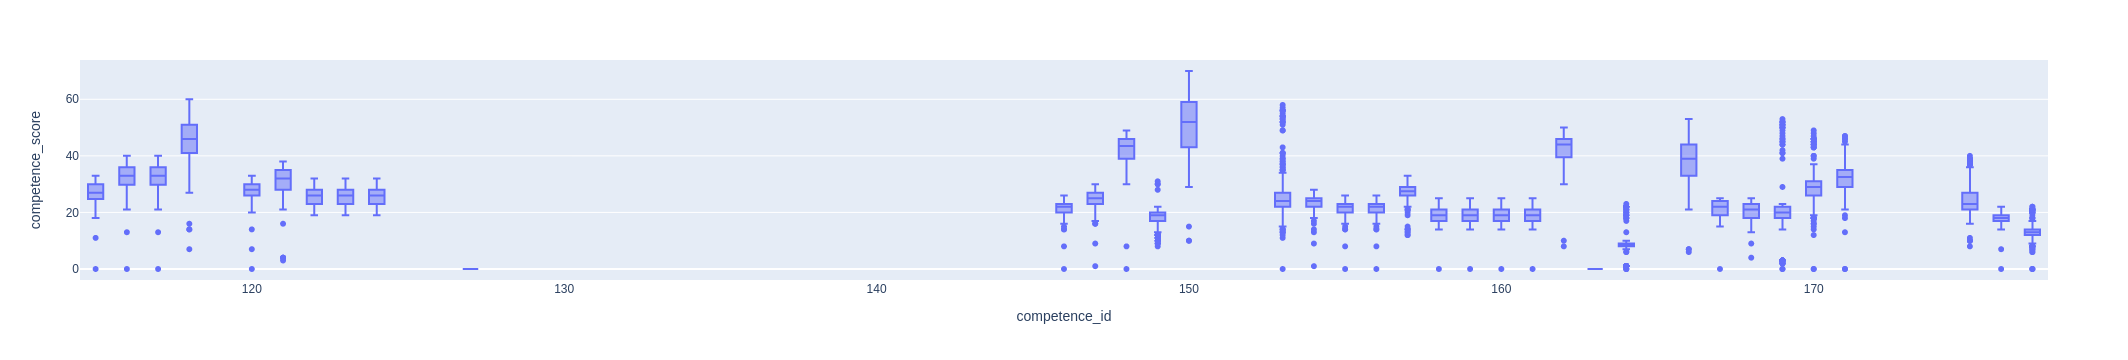

In [20]:
fig = px.box(competence_scores, x="competence_id", y="competence_score")
fig.show()

# Quantidade de alunos por competência

In [21]:
competence_count = (
    competence_scores[['competence_id', 'student_id']]
        .groupby(by='competence_id')
        .count()
        .rename(columns={'student_id': 'candidates_count'})
        .reset_index()
)

competence_count['proportion'] = competence_count.candidates_count / n_student_ids

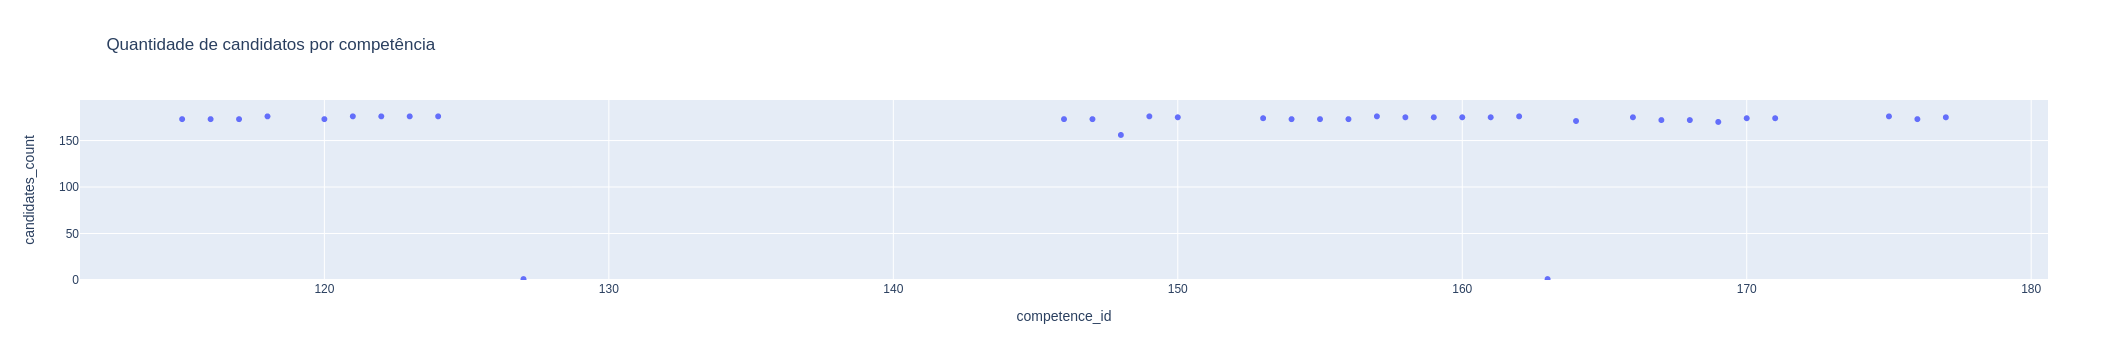

In [22]:
fig = px.scatter(
    competence_count,
    x='competence_id',
    y='candidates_count',
    title='Quantidade de candidatos por competência'
)
fig.update_yaxes(range=[0, 1.1*competence_count.candidates_count.max()])
fig.show()

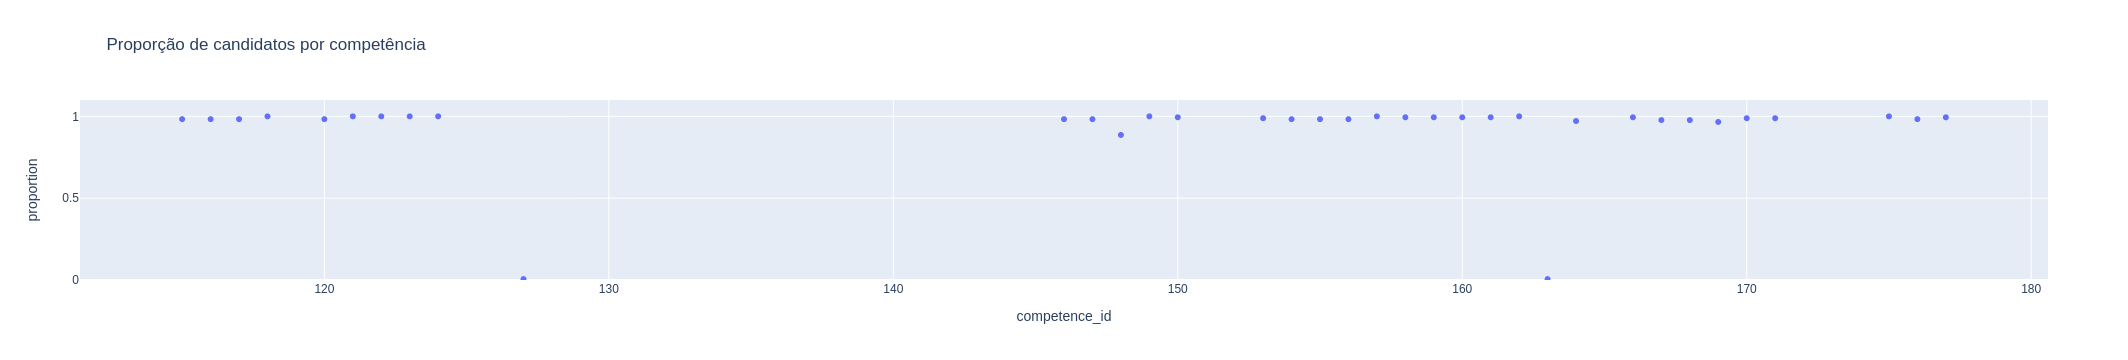

In [23]:
fig = px.scatter(
    competence_count,
    x='competence_id',
    y='proportion',
    title='Proporção de candidatos por competência'
)
fig.update_yaxes(range=[0, 1.1])
fig.show()

# Quantas competências cada aluno tem?

In [24]:
n_competences = competence_count.competence_id.drop_duplicates().count()
print(f'# de competências: {n_competences}')

# de competências: 36


In [25]:
candidates_count = (
    competence_scores[['competence_id', 'student_id']]
        .groupby(by='student_id')
        .count()
        .rename(columns={'competence_id': 'competence_count'})
        .reset_index()
)

candidates_count['competence_proportion'] = candidates_count.competence_count / n_competences

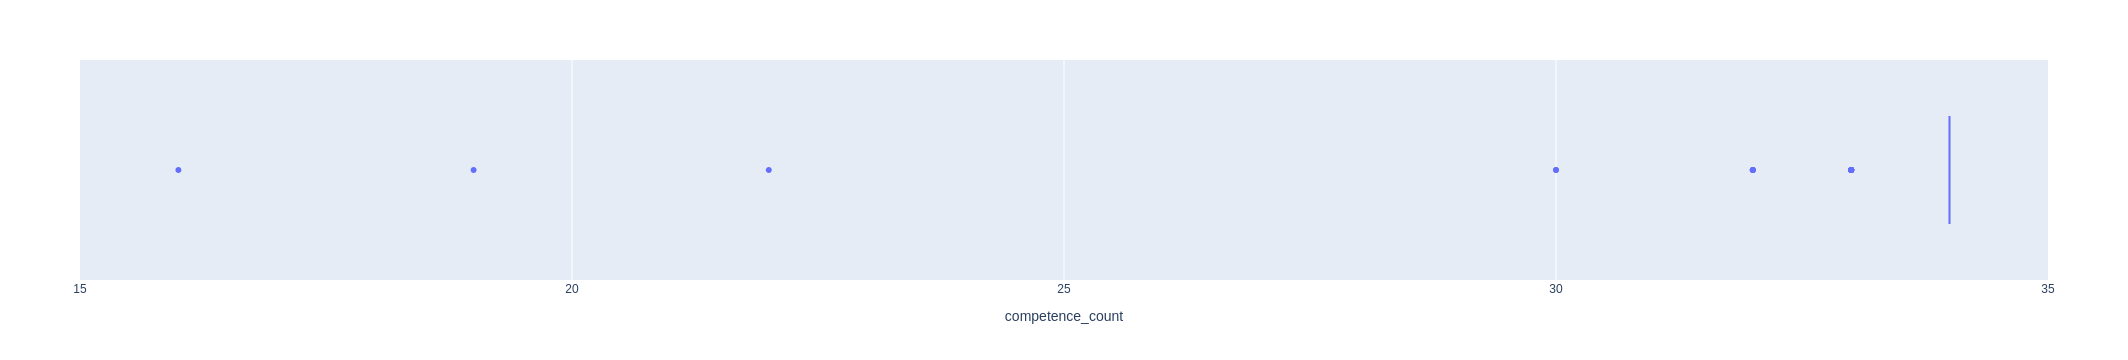

In [26]:
fig = px.box(candidates_count, x="competence_count")
fig.show()